# 퍼셉트론과 신경망

시그모이드 함수

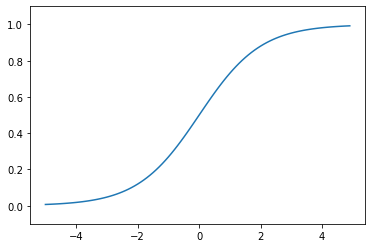

In [1]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5,5,0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

계단함수와 시그모이드 함수의 차이 인지하기

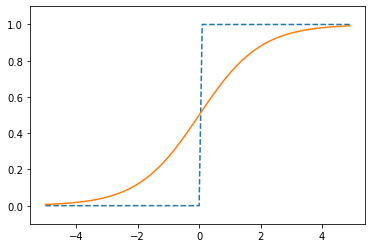

In [3]:
plt.plot(x,step_function(x),linestyle="--")
plt.plot(x,sigmoid(x))
plt.ylim(-0.1,1.1)
plt.show()

시그모이드 함수를 대체하는 정류함수 ReLU 함수

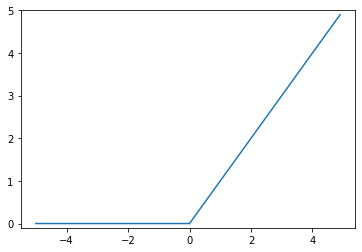

In [11]:
import numpy as np
import matplotlib.pylab as plt

def ReLU(x):
    return np.maximum(0,x)
# 두 입력 중에서 큰 값을 선택해 반환하는 함수

x = np.arange(-5,5,0.1)
y = ReLU(x)

plt.plot(x,y)
plt.ylim(-0.1,5)
plt.show()

신경망에서 행렬 곱

In [16]:
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


3층 신경망 구현하기

In [30]:
#1층 : 활성화함수(시그모이드)
X = np.array([1,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

A1 = np.dot(X,W1) + B1
print(A1.shape)
Z1 = sigmoid(A1)
print(Z1)

# 2층 : 활성화함수(시그모이드)
W2 = np.array([[0.1,0.4],[0.3,0.2],[0.6,0.1]])
print(W2.shape)
B2 = np.array([0.1,0.2])
A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)
print(Z2)

# 3층 : 항등함수
def identity_function(x):
    return x

B3 = np.array([0.3,0.1])
W3 = np.array([[0.1,0.3],[0.2,0.4]])
A3 = Z2*W3 + B3
Z3 = identity_function(A3)
print(Z3)

(3,)
[0.57444252 0.66818777 0.75026011]
(3, 2)
[0.69169523 0.65440086]
[[0.36916952 0.29632026]
 [0.43833905 0.36176035]]


3층 퍼셉트론 구현정리
- 초기에 가중치, 편향을 정의하는 network 함수
- 입력신호를 출력신호로 산출하는 forward 함수(순방향)
- 2x3x2x2 구조

In [32]:
def init_network():
    network = {}
    network["W1"] = np.array([[1,0.3,0.2],[0.3,0.2,0.1]])
    network["W2"] = np.array([[0.3,0.2],[0.6,0.2],[0.1,0.3]])
    network["W3"] = np.array([[0.2,0.1],[0.2,0.4]])
    network["B1"] = np.array([0.2,0.3,0.2])
    network["B2"] = np.array([0.3,0.1])
    network["B3"] = np.array([0.1,0.6])
    return network

def forward(network,X):
    Z1 = sigmoid(np.dot(X,W1)+B1)
    Z2 = sigmoid(np.dot(Z1,W2)+B2)
    Z3 = identity_function(np.dot(Z2,W3)+B3)
    return Z3

network = init_network()
Y = forward(network,[0.2,0.6])
print(Y)

[0.49783601 0.56362304]


3층 퍼셉트론 이용하기
- 분류, 회귀

In [36]:
# 마지막 뉴런에 있는 활성화함수를 계단함수로 바꿔서 분류로 만들어보기
def forward_classify(network,X):
    Z1 = sigmoid(np.dot(X,W1)+B1)
    Z2 = sigmoid(np.dot(Z1,W2)+B2)
    Z3 = step_function(np.dot(Z2,W3)+B3)
    return Z3

network = init_network()
Y = forward_classify(network,[0.2,0.6])
print(Y)
# 활성값을 계단함수에 넣었는데 활성값이 모두 0 보다 크기에 1이 출력된 것이다

[1 1]


분류를 위한 활성화 함수 : 소프트맥스

In [37]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

In [38]:
softmax(np.array([0.3,2.4,4.9]))

array([0.00920382, 0.07515999, 0.91563618])

소프트맥스 함수의 문제 오버플로

In [41]:
a = np.array([1010,1000,990])
softmax(a)
# e^1000이 되면 inf가 되어버린다. 컴퓨터 바이트의 표현 한계

<ipython-input-37-2d0faf907c9c>:2: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
<ipython-input-37-2d0faf907c9c>:4: RuntimeWarning: invalid value encountered in true_divide
  return exp_a / sum_exp_a


array([nan, nan, nan])

In [42]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

In [45]:
a = np.array([0.3,2.9,4.6])
y = softmax(a)
print(y)
print(sum(y))

[0.01134256 0.15271323 0.83594421]
0.9999999999999999
